In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%pylab inline
import re
import textblob
import nltk
nltk.download('vader_lexicon')

Populating the interactive namespace from numpy and matplotlib


C:\Users\Sanjana Ashtaputre\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
[nltk_data] Downloading package vader_lexicon to C:\Users\Sanjana
[nltk_data]     Ashtaputre\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [51]:
sh= pd.read_csv("TM1.csv")

In [52]:
sh.head()

,Unnamed: 0,business_id,CleanedText,text,name,label
0,0,oxwGyA17NL6c5t1Etg5WgQ,getting parts beast,Getting parts for the beast.,Fry's,service
1,1,sM9PBSiVh1n3eGCgnT93yg,yep back,yep back again,The Home Depot,service
2,2,nqScdFlLTUO1PlSUQR3yjQ,favorite place find magazines love discover ne...,My favorite place to find the magazines I love...,Barnes & Noble,store
3,3,nAaQmbs-eCA0sdTY4WXgmQ,nice selection hot little tops bottoms,Nice selection. Hot little tops and bottoms,Hottie's World,product
4,4,gy-HBIeJGlQHs4RRYDLuHw,shoppingggg,Shoppingggg.....,Town Square Las Vegas,store


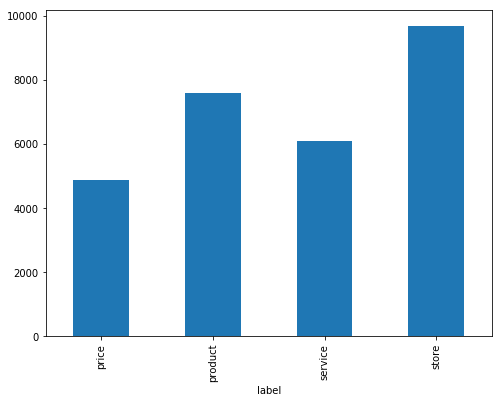

In [53]:
fig=plt.figure(figsize=(8,6))
sh.groupby(sh['label']).text.count().plot.bar(ylim=0)
plt.show()

In [54]:
all_reviews = sh['text']
all_sent_values = []
all_sentiments = []

In [55]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(str(paragraph))
    score = result['compound']
    return round(score,1)

In [56]:
sample = sh['text'][1231]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

Got my king size bed here a year ago! Awesome selection great customer service!
Sentiment: 
0.9


In [59]:
for i in range(0,28240):
    all_sent_values.append(sentiment_value(all_reviews[i]))

In [61]:
sh.shape

(28240, 6)

In [62]:
len(all_sent_values)

28240

In [63]:
temp_data = sh[0:28240]
temp_data.shape

(28240, 6)

In [64]:
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,28240):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(1)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(0.5)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(0)
    else:
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(0)

In [65]:
temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
temp_data['SENTIMENT'] = SENTIMENT

C:\Users\Sanjana Ashtaputre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sanjana Ashtaputre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
temp_data.head()

,Unnamed: 0,business_id,CleanedText,text,name,label,SENTIMENT_VALUE,SENTIMENT
0,0,oxwGyA17NL6c5t1Etg5WgQ,getting parts beast,Getting parts for the beast.,Fry's,service,1,Positive
1,1,sM9PBSiVh1n3eGCgnT93yg,yep back,yep back again,The Home Depot,service,1,Positive
2,2,nqScdFlLTUO1PlSUQR3yjQ,favorite place find magazines love discover ne...,My favorite place to find the magazines I love...,Barnes & Noble,store,1,Positive
3,3,nAaQmbs-eCA0sdTY4WXgmQ,nice selection hot little tops bottoms,Nice selection. Hot little tops and bottoms,Hottie's World,product,1,Positive
4,4,gy-HBIeJGlQHs4RRYDLuHw,shoppingggg,Shoppingggg.....,Town Square Las Vegas,store,1,Positive


In [67]:
testing2 = pd.pivot_table(temp_data,index=['label'],values=['text','SENTIMENT_VALUE','SENTIMENT'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing2.head(10)

,sum,mean
,SENTIMENT_VALUE,SENTIMENT_VALUE
label,,
price,4175,0.856059
product,6681,0.882213
service,5097,0.835163
store,8426,0.869826


In [72]:
t=temp_data.groupby(["business_id","name","label","SENTIMENT"]).count()
t

Unnamed: 0  \
business_id            name                                               label   SENTIMENT               
-28hEE6AcAUbJctGwvC9kw Culinary Pharmacy                                  price   Positive            1   
                                                                          service Positive            1   
-2_l2p8bdI91G3-EIjSikg Adore Organic Innovation                           product Positive            1   
                                                                          service Positive            1   
                                                                          store   Negative            1   
-2ym8gLGnYV5uEgyMXnL7A Amazing Las Vegas Comic Con                        product Positive            2   
                                                                          store   Positive            2   
-3bL-QmK7-qBYLmQuSekBw Impressions Tile & Marble                          product Positive            2   
-6gD8mJAEFI-YbUBygjO8A T-Mobile                                           service Negative            1   
-8oefCbONloutvAy9uTa-A Edward J Malik, OD - Eyes & Optics                 product Positive            1   
-BFKA4HVeRoR1uObH0JpJw One Love Vapors                                    price   Positive            2   
                                                                          product Positive            1   
                                                                          service Positive            2   
                                                                          store   Positive            2   
-CHzSNANra-TCIWYFfpR0Q Macy's                                             price   Positive            3   
                                                                          product Negative            2   
                                                                                  Positive            4   
                                                                          service Negative            2   
                                                                                  Positive            3   
                                                                          store   Positive            4   
-H49o1OyiCgTsLjsiDNISA Dollar General                                     store   Negative            1   
                                                                                  Positive            2   
-HSe4xoW0fQADWUuMA6uSQ Christmas Goose Country Gifts & Quilt Shop         product Positive            1   
-Hfh0LdzkAPVfZUwRKNzJg Cartier                                            service Positive            1   
-IcHkc7uWC8dHGlAOK4sJw Nevada Coin Mart @ Jones and Flamingo - Neil Sa... price   Positive            2   
                                                                          product Positive            1   
                                                                          service Positive            1   
                                                                          store   Positive            3   
-MeuB47l8juXTDwROY1vag Naylor Solar Specialist                            product Positive            1   
-MhfebM0QIsKt87iDN-FNw Bellagio Gallery of Fine Art                       price   Positive            3   
...                                                                                                 ...   
zu0a9GPCG8i7jbAJ3-H6LQ Smith's                                            service Negative            1   
                                                                                  Positive            4   
                                                                          store   Negative            1   
                                                                                  Positive            8   
zuApMGGwD5Ra5GJN7rROLQ Clear Vision Eye Centers - Warm Springs            service Negative            1   
                           

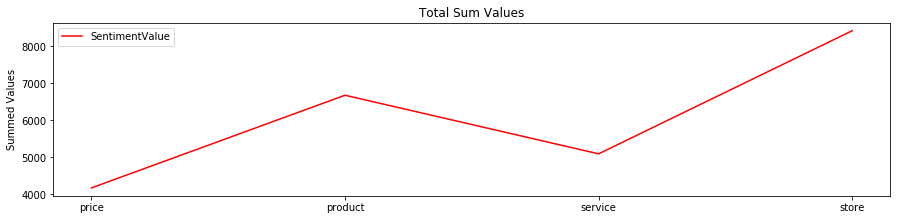

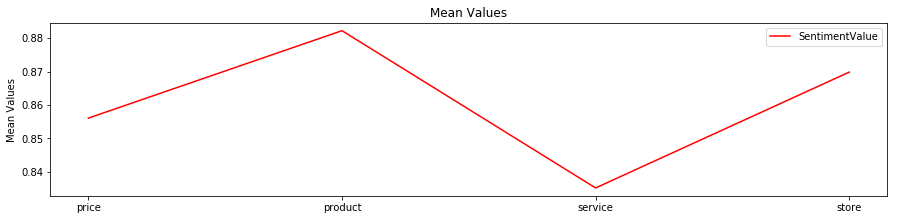

In [68]:
import pylab

names = testing2.index[:10]
y = testing2['sum', 'SENTIMENT_VALUE'][:10]

pylab.figure(figsize=(15,7))
x = range(4)
pylab.subplot(2,1,1)
pylab.xticks(x, names)
pylab.ylabel('Summed Values')
pylab.title('Total Sum Values')
pylab.plot(x,y,"r-")
pylab.legend(['SentimentValue'])

y_new = testing2['mean', 'SENTIMENT_VALUE'][:10]

pylab.figure(figsize=(15,7))

pylab.subplot(2,1,2)
pylab.xticks(x, names)
pylab.ylabel('Mean Values')
pylab.title('Mean Values')
pylab.plot(x,y_new,"r-")
pylab.legend(['SentimentValue'])


pylab.show()


In [76]:
#plot = temp_data.plot.pie(y='SENTIMENT_VALUE', figsize=(5, 5))